<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/R_C2_L7_Differential_Gene_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to R-Coding Course 2!**

In the previous lesson, we covered Data visualization using t-SNE. If you haven't completed these topics, please refer to [L06 - Statistical Analysis Tests](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/06-statistical-analysis-tests) before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L07 - Differential Gene Expression](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/07-differential-gene-expression), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# **Lesson Code Breakdown**

## **1. Install Packages**

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")


This R code checks if the "BiocManager" package is available; if not, it installs the package. The "BiocManager" package is often used for managing and installing Bioconductor packages, which are specific to bioinformatics and genomics analyses in R. This code ensures that the package is available for use in subsequent analyses.

In [ ]:
BiocManager::install("DESeq2")
BiocManager::install("EnhancedVolcano")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'DESeq2'

also installing the dependencies ‘BH’, ‘BiocParallel’


Old packages: 'bit', 'brew', 'brio', 'cli', 'curl', 'data.table', 'DBI',
  'desc', 'devtools', 'gargle', 'highr', 'isoband', 'openssl', 'pkgbuild',
  'processx', 'ragg', 'roxygen2', 'stringi', 'svglite', 'textshaping',
  'whisker', 'yaml', 'boot', 'cluster', 'mgcv', 'nlme'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'EnhancedVolcano'

also installing the dependency ‘ggrepel’


Old packages: 'bit', 'bre


These R code lines install the "DESeq2" and "EnhancedVolcano" packages from the Bioconductor repository using the "BiocManager" package. "DESeq2" is commonly used for differential gene expression analysis, and "EnhancedVolcano" is often used for producing enhanced volcano plots to visualize differential expression results.

## **2. Load libraries.**

In [ ]:
library(DESeq2)
library(EnhancedVolcano)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa


These R code lines load the "DESeq2" and "EnhancedVolcano" packages into your R session. The library function is used to load these packages, making their functions and features available for use in your R script or console.

## **3. Load data.**

In [ ]:
PDXdataset = read.table('https://drive.google.com/uc?export=download&id=1tb_qnLwjeAf0B5gWmi7_6SGOqy44dU8x', header = TRUE,row.names = 1, sep='\t')


This R code reads a dataset named "PDXdataset" from a Google Drive link using read.table. It assumes the data is tab-separated with the first row as column headers and the first column as row names.

## **4. Define data and remove id column.**

In [ ]:
data <- (PDXdataset)
colnames(PDXdataset) -> names
meta_classes<- c('ER','ER','ER','ER', 'ER', 'ER', 'ER', 'TN','TN','TN','TN','TN', 'TN', 'TN')
meta_data <- data.frame(names, meta_classes)


This R code assigns the loaded dataset "PDXdataset" to the variable "data." It then extracts column names from "PDXdataset" and stores them in the "names" vector. Subsequently, a new data frame named "meta_data" is created, combining the extracted column names with a vector specifying meta-classes ("ER" and "TN"). Each column in the original dataset corresponds to a specific meta-class as defined in the "meta_classes" vector.

## **5. Perform first step of DESeq (Define DESeq dataset).**

In [ ]:
ds <- DESeqDataSetFromMatrix(countData=data, colData=meta_data, design=~meta_classes)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”



This R code uses the DESeq2 package to create a DESeqDataSet named "ds" from the count data in the "data" matrix and the metadata in the "meta_data" data frame. The design formula (~meta_classes) specifies the experimental design, indicating that the variable "meta_classes" is the main factor of interest in the differential expression analysis.

## **6. Perform DEseq and create results object.**

In [ ]:
Ds <- DESeq(ds)
res <- results(Ds)
print(res)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 91 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): meta classes TN vs ER 
Wald test p-value: meta classes TN vs ER 
DataFrame with 102861 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat    pvalue
                       <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000000003                0             NA        NA        NA        NA
ENSG00000000005                0             NA        NA        NA        NA
ENSG00000000419                0             NA        NA        NA        NA
ENSG00000000457                0             NA        NA        NA        NA
ENSG00000000460                0             NA        NA        NA        NA
...                          ...            ...       ...       ...       ...
__alignment_not_unique  94370.03       0.342767  0.525411   0.65238 0.5141564
__ambiguous              9299.40       0.550976  0.331630   1.66142 0.0966291
__no_feature           209554.20       1.552030  0.606341   2.55966 0.0104773
__not_aligne


This R code performs differential expression analysis using DESeq2. The DESeq function is used to estimate size factors and dispersion, and then the results function is applied to obtain the results of the analysis, stored in the "res" object. Finally, the print function is used to display the differential expression results, which include log2-fold changes, standard errors, Wald test statistics, and p-values for each gene.

## **7. Output results in.txt format.**

In [ ]:
write.table(res,"DESeq2_PDX_R.txt", row.names=TRUE,col.names=NA, sep="\t", quote=TRUE, append=TRUE)

Warning message in write.table(res, "DESeq2_PDX_R.txt", row.names = TRUE, col.names = NA, :
“appending column names to file”


This R code writes the differential expression results stored in the "res" object to a tab-separated text file named "DESeq2_PDX_R.txt." The write.table function is used with the specified file name, row names included, no column names (col.names=NA), tab-separated format (sep="\t"), quoting of values (quote=TRUE), and append mode (append=TRUE). The resulting file contains the differential expression information and can be further analyzed or shared.

## **8. Create MA plot.**

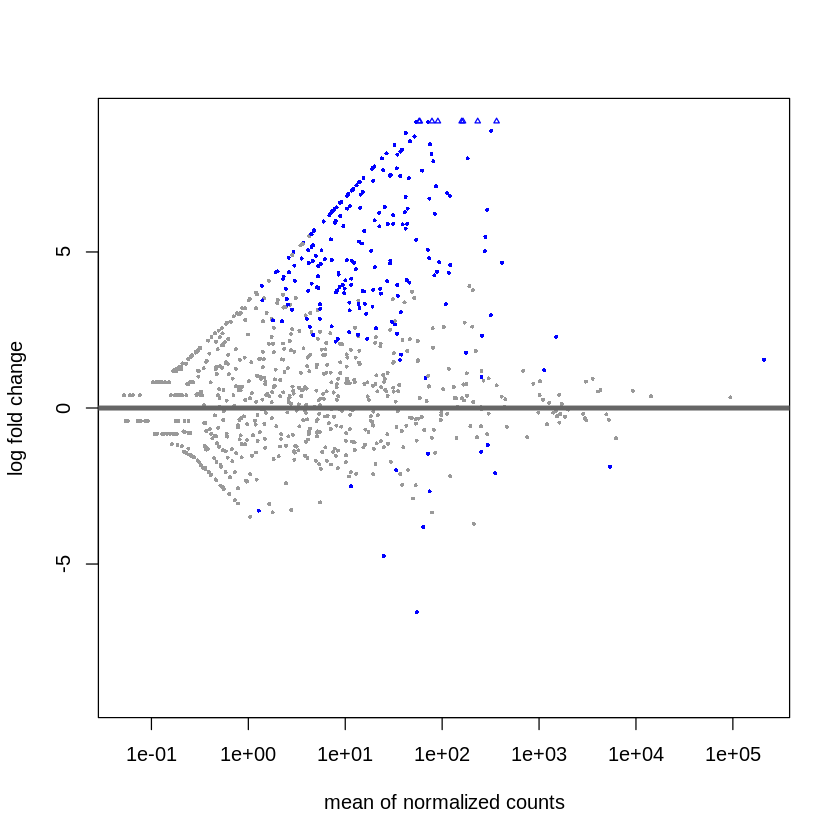

In [ ]:
plotMA(res)


This R code generates an MA plot using the DESeq2 package, visualizing the log2-fold changes (M) against the mean of normalized counts (A) for each gene in the differential expression analysis results (res). The plotMA function is used to create this plot, providing a graphical representation of the distribution of gene expression changes and highlighting differentially expressed genes.

## **9. Create enhance volcano plot with identified differentially expressed genes.**

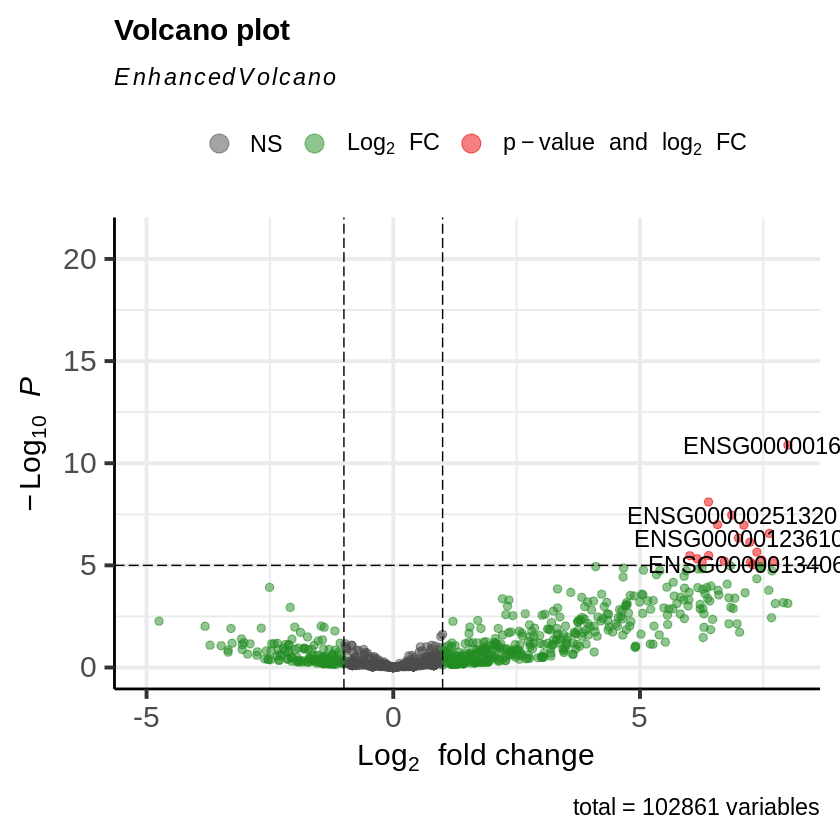

In [ ]:
EnhancedVolcano(res, x = 'log2FoldChange', y = 'pvalue', lab = rownames(res), xlim = c(-5, 8))


This R code uses the "EnhancedVolcano" package to create an enhanced volcano plot based on the differential expression results stored in the "res" object. The log2-fold changes are plotted on the x-axis (x = 'log2FoldChange'), p-values on the y-axis (y = 'pvalue'), and gene labels are displayed (lab = rownames(res)). The x-axis limits are set to (-5, 8) using xlim. This volcano plot visually represents the significance and magnitude of gene expression changes in the dataset.